# Исследование данных о продаже товаров

**Цель** - <em>выявить факторы, которые влияют на продажу товаров.</em><br>

**Описание данных**
-	order_id - индетификатор заказа
-	order_date — дата заказа
-	ship_date — дата доставки
-	ship_mode — класс доставки
-	customer_id — идентификатор покупателя
-	customer_name — имя покупателя
-	segment — сегмент покупателя
-	country — страна
-	city — город
-	state — штат
-	postal_code — почтовый индекс
-	region — регион
-	product_id — идентификатор товара
-	category — категория
-	sub_category — подкатегория
-	sales — прожажи (доход)
-	ponds_nearest — расстояние до ближайшего водоёма (м)
-	quantity — количество
-	discount — скидка
-	profit - прибыль
-	person — региональный менеджер
-   returned - возвраты товара<br></em>

## Оглавление
1. [Загрузка данных и изучение общей информации по проекту](#download-data)
2. [Предобработка данных](#data-preprocessing)
    - [Проверка и обработка текстовых данных](#data-str-check)
    - [Обработка числовых значений](#data-type-change)
3. [Расчет данных  и добавление их таблицу](#data-counting)
    - [Определение месяца оформления заказа](#determine-the-day-of-the-week-month-and-year)
    - [Расчет периода доставки товара](#categorizing-the-apartment-by-floor)
4. [Анализ данных](#data-analysis)
    - [Исследование динамики продаж](#research-parameters)
    - [Исследование объема продаж в зависимости от класса доставки](#researching-days-exposition)
    - [Определение наиболее популярных категорий товаров](#processing-rare&knockout-values)
    - [Определение наиболее прибыльных товаров](#research-factors-affecting-cost)
    - [Исследование штатов с наибольшим объемом продаж](#research-exposition-location)
    - [Определение целевой аудитории](#research-centre-or-no-centre)
    - [Исследование характерных параметров для апартаментов, студий и квартир свободной планировки](#research-nontypical-flat)
5. [Проверка гипотез](#hypothesis-testing)    
    - [Проверка гипотезы о различной средней прибыли по продажам товаров категории Technology и Furniture](#revenue-difference)
6. [Выводы](#conclusions)

## <a id='download-data'><span style="color:black">1. Загрузка данных и изучение общей информации по проекту</span></a>

Предварительное изучение данных с помощью текствого редактора позволило определить столбец 'Row ID' в качестве индекса, что позволяет оптимизировать размер используемой
память.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# код для отображения 30 столбцов
pd.options.display.max_columns = 30
from scipy import stats as st
from skimpy import clean_columns

In [2]:
data = pd.read_excel('datasets/superstore.xlsx', index_col='Row ID')
display(data)
display(data.describe())
display(data.info())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Person,Returned
Row ID,,,,,,,,,,,,,,,,,,,,,,
1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Cassandra Brandow,No
2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Cassandra Brandow,No
3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Anna Andreadi,No
4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Cassandra Brandow,No
5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Cassandra Brandow,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,Cassandra Brandow,No
9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,Anna Andreadi,Yes
9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,Anna Andreadi,Yes


,Postal Code,Sales,Quantity,Discount,Profit
count,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,229.858001,3.789574,0.156203,28.656896
std,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9983 non-null   float64       
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

None

Предоставленная база данных состоит из 9994 строк и 21 столбца. Предварительно изучение данных позволяет выявить следующие недостатки: в столбце Postal Code имеются пропущенные значения. Так как столбцы Customer ID, Postal Code и Product ID для целей анализа не информативны такие столбцы можно удалить из базы данных.

**Вывод:** Изучение данных позволило выявить некоторые недостатки данных, которые необходимо устранить до перехода к анализу.

## <a id='data-preprocessing'><span style="color:black">2. Предобработка данных</span></a>

### <a id='data-str-check'><span style="color:black">Проверка и обработка текстовых данных</span></a>

Проверяем корректность названий столбцов.

In [3]:
display(data.columns.values.tolist())

['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Person',
 'Returned']

Названия столбцов в целом корректны, однако имеют лишние пробелы между словами. Изменим регистр названия на нижний и уберем лишние пробелы с помощью метода clean_columns() библитеки skimpy.

In [4]:
data = clean_columns(data)
display(data.columns.tolist())

22 column names have been cleaned

['order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'person',
 'returned']

Рассмотрим пропущенные значения в столбце postal_code.

In [5]:
display(data[data['postal_code'].isnull()])
print(f'Количество пропущенных значений: {data["postal_code"].isnull().sum()}')

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,person,returned
Row ID,,,,,,,,,,,,,,,,,,,,,,
2235,CA-2019-104066,2019-12-05,2019-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599,Chuck Magee,No
5275,CA-2017-162887,2017-11-07,2017-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000,Chuck Magee,No
8799,US-2018-150140,2018-04-06,2018-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350,Chuck Magee,No
9147,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914,Chuck Magee,No
9148,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336,Chuck Magee,No
9149,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154,Chuck Magee,No
9387,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624,Chuck Magee,No
9388,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716,Chuck Magee,No
9389,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232,Chuck Magee,No


Количество пропущенных значений: 11


Как видим в столбце postal_code пропущено 11 значений. Все они относятся к городу Burlington штата Vermont. В такой ситуации можно было бы найти почтовый индекс города и произвести замену пустых значений. Кроме того, пропущенные значения имеют еще одну общую характеристику: менеджером, который заключал сделку являлся Chuck Magee. Скорее всего пропущенные значения были допущены по невнимательности менеджера, который не внес своевременно информацию в базу данных. Так как данные из столбца postal_code не имеют существенного значения для анализа данных, то удалим данный столбец, а также столбцы сustomer_id и product_id.

In [6]:
data = data.drop(['customer_id', 'postal_code', 'product_id'], axis=1)
display(data.head())

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,person,returned
Row ID,,,,,,,,,,,,,,,,,,,
1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Cassandra Brandow,No
2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Cassandra Brandow,No
3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Anna Andreadi,No
4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Cassandra Brandow,No
5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Cassandra Brandow,No


### <a id='data-type-change'><span style="color:black">Обработка числовых значений</span></a>

Округлим числа в столбце profit до 2 знаков после запятой.

In [7]:
data.profit = data.profit.round(2)
data.profit.head()

Row ID
1     41.91
2    219.58
3      6.87
4   -383.03
5      2.52
Name: profit, dtype: float64

Числовые значения в таком формате более удобны для восприятия и дальнейшего анализа.

**Выводы:** 
- В базе данных имелось некоторе количество пропущенных значений: отсутствовал индекс города Берлингтон штата Вайоминг. Такой пропуск можно легко восстановить используя информацию из открытыx источников. 
- В целом в представленная база данных не имела существенных недостатков. 

## <a id='data-counting'><span style="color:black">3. Расчет данных и добавление их таблицу</span></a>

### <a id='determine-the-day-of-the-week-month-and-year'><span style="color:black">Определение месяца оформления заказа</span></a>

In [8]:
data['weekday_order'] = pd.to_datetime(data['order_date'], format='%Y-%m-%d %H:%M').dt.weekday
data['month_order'] = pd.to_datetime(data['order_date'], format='%Y-%m-%d %H:%M').dt.month
data['year_order'] = pd.to_datetime(data['order_date'], format='%Y-%m-%d %H:%M').dt.year
display(data.head())

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,person,returned,weekday_order,month_order,year_order
Row ID,,,,,,,,,,,,,,,,,,,,,,
1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.91,Cassandra Brandow,No,3,11,2018
2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.58,Cassandra Brandow,No,3,11,2018
3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.87,Anna Andreadi,No,1,6,2018
4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.03,Cassandra Brandow,No,2,10,2017
5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.52,Cassandra Brandow,No,2,10,2017


### <a id='categorizing-the-apartment-by-floor'><span style="color:black">Расчет периода доставки товара</span></a>

In [9]:
data['delivery_time'] = data.ship_date - data.order_date
display(data.head())

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,person,returned,weekday_order,month_order,year_order,delivery_time
Row ID,,,,,,,,,,,,,,,,,,,,,,,
1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.91,Cassandra Brandow,No,3,11,2018,3 days
2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.58,Cassandra Brandow,No,3,11,2018,3 days
3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.87,Anna Andreadi,No,1,6,2018,4 days
4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.03,Cassandra Brandow,No,2,10,2017,7 days
5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.52,Cassandra Brandow,No,2,10,2017,7 days


**Выводы:** Оперируя имеющимися данными можно получить дополнительную информацию и значительно расширить возможности анализа базы данных.

## <a id='data-analysis'><span style="color:black">4. Анализ данных</span></a>

### <a id='research-parameters'><span style="color:black">Исследование динамики продаж</span></a>

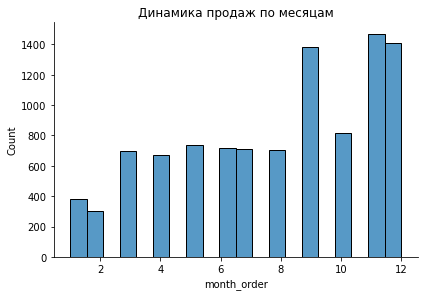

,month_order,sales,profit,quantity
0,12,325293.5035,43368.92,5419
1,11,352461.0710,35468.29,5775
2,10,200322.9847,31784.04,3104
3,9,307649.9457,36857.22,5062
4,8,159044.0630,21776.92,2784
5,7,147238.0970,13832.55,2705
6,6,152718.6793,21285.77,2680
7,5,155028.8117,22411.21,2791
8,4,137762.1286,11587.43,2447
9,3,205005.4888,28594.53,2564


In [13]:
sns.displot(data['month_order'], legend=True, height=4, aspect=1.5)

plt.title('Динамика продаж по месяцам')
plt.show()
month_sale = (
    data.groupby('month_order')
    .agg({'sales': 'sum', 'profit': 'sum', 'quantity': 'sum'})
    .sort_values('month_order', ascending=False)
)
month_sale.reset_index(inplace=True)
display(month_sale)

Анализ динамики продаж показывает, что в начале года покупательская активность не очень высокая и наоборот в конце года она достигает своего максимума. При чем такая динамика наблюдается и по всем показателям: и по количеству продаваемых товаров и объему продаж и по прибыли от продаж.

### <a id='researching-days-exposition'><span style="color:black">Исследование объема продаж в зависимости от класса доставки</span></a>

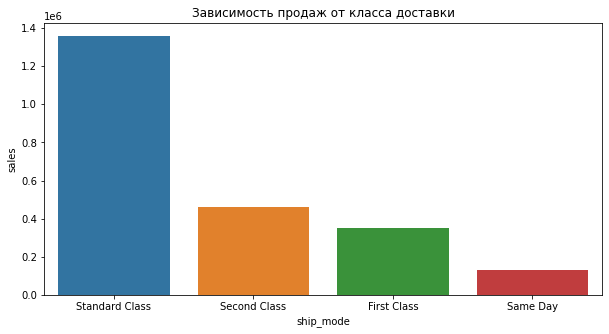

,ship_mode,sales,order_id,delivery_time
0,Standard Class,1.358216e+06,5968,5 days 00:09:24.611260053
1,Second Class,4.591936e+05,1945,3 days 05:42:02.776349614
2,First Class,3.514284e+05,1538,2 days 04:23:05.695708712
3,Same Day,1.283631e+05,543,0 days 01:03:38.784530386


In [14]:
ship_time = (data.groupby('ship_mode')
    .agg({'sales': 'sum', 'order_id': 'count', 'delivery_time': 'mean'})
    .sort_values('delivery_time', ascending=False)
)
ship_time.reset_index(inplace=True)
plt.figure(figsize = (10,5))
sns.barplot(y = "sales", x = "ship_mode", data = ship_time)
plt.title('Зависимость продаж от класса доставки')
plt.show()
display(ship_time)

Анализ по классу доставки показывает, что покупатели заказывают больше товара с большим сроком доставки. Это свидетельствует о том, что потребители предпочитают подождать доставку товара, чем переплачивать за нее.

### <a id='processing-rare&knockout-values'><span style="color:black">Определение наиболее популярных категорий товаров</span></a>

С помощью графиков и расчетов наиболее популярные категории товаров.

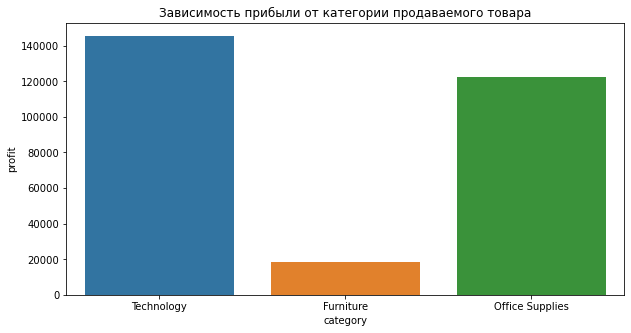

,category,quantity,sales,profit,order_id
0,Technology,6939,836154.0330,145455.35,1847
1,Furniture,8028,741999.7953,18451.11,2121
2,Office Supplies,22906,719047.0320,122489.43,6026


In [15]:
popular_category = (
    data.groupby('category')
    .agg({'quantity': 'sum', 'sales': 'sum', 'profit': 'sum', 'order_id': 'count'})
    .sort_values('sales', ascending=False)
)
popular_category.reset_index(inplace=True)
plt.figure(figsize = (10,5))
sns.barplot(y = "profit", x = "category", data = popular_category)
plt.title('Зависимость прибыли от категории продаваемого товара')
plt.show()
display(popular_category)

Анализ продаж по категориям товаров показывает, что товары категории Office Supplies пользуются наибольшей популярностью и за счет количества продоваемых товаров при меньшей средней стоимости продажа товаров данной категории позволяет получать прибыль на уровне категории Technology. Товары категории Furniture хоть и имеют больший средний чек, но при этом значительно уступают в части прибыли. Судя по всему это связано со значительными затратами на изготовление и (возможно) доставку таких товаров.

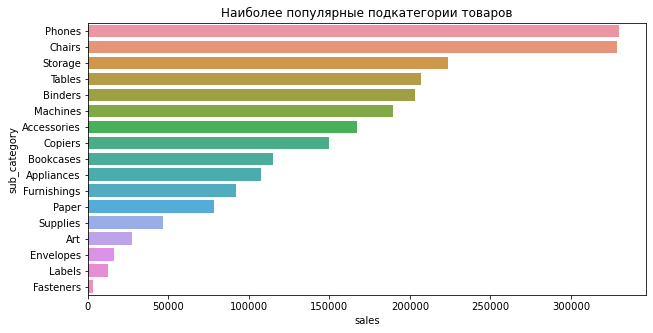

,sub_category,quantity,sales,profit,order_id
0,Phones,3289,330007.0540,44516.03,889
1,Chairs,2356,328449.1030,26590.10,617
2,Storage,3158,223843.6080,21278.83,846
3,Tables,1241,206965.5320,-17725.60,319
4,Binders,5974,203412.7330,30221.36,1523
5,Machines,440,189238.6310,3384.72,115
6,Accessories,2976,167380.3180,41936.73,775
7,Copiers,234,149528.0300,55617.87,68
8,Bookcases,868,114879.9963,-3472.58,228
9,Appliances,1729,107532.1610,18137.97,466


In [16]:
popular_sub_category = (
    data.groupby('sub_category')
    .agg({'quantity': 'sum', 'sales': 'sum', 'profit': 'sum', 'order_id': 'count'})
    .sort_values('sales', ascending=False)
)

popular_sub_category.reset_index(inplace=True)
plt.figure(figsize = (10,5))
sns.barplot(x = "sales", y = "sub_category", data = popular_sub_category)
plt.title('Наиболее популярные подкатегории товаров')
plt.show()
display(popular_sub_category)

Анализ по отдельным подкатегориям товаров показывает, что наибольший объем продаж (выручка) дают товары Phones и Chairs. При этом прибыль по подкатегории Phones почти в два раза выше при большем количестве заказов. Это подтверждает вывод о том, что тавары категории Furniture имеют высокую стоимость, но и также высокую себестоимость изготовления и продажи, что влияет на прибыль.

### <a id='research-factors-affecting-cost'><span style="color:black">Определение наиболее прибыльных товаров</span></a>

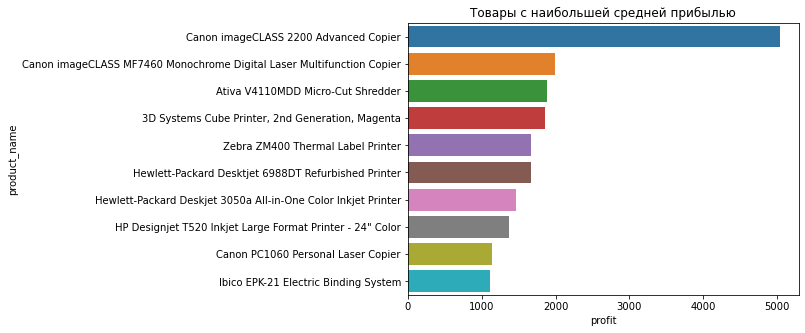

,product_name,quantity,sales,profit
0,Canon imageCLASS 2200 Advanced Copier,20,61599.824,5039.988000
1,Canon imageCLASS MF7460 Monochrome Digital Las...,2,3991.980,1995.990000
2,Ativa V4110MDD Micro-Cut Shredder,11,7699.890,1886.475000
3,"3D Systems Cube Printer, 2nd Generation, Magenta",11,14299.890,1858.985000
4,Zebra ZM400 Thermal Label Printer,6,6965.700,1671.765000
5,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,5,3404.500,1668.200000
6,Hewlett-Packard Deskjet 3050a All-in-One Color...,8,3040.000,1459.200000
7,HP Designjet T520 Inkjet Large Format Printer ...,12,18374.895,1364.993333
8,Canon PC1060 Personal Laser Copier,19,11619.834,1142.735000
9,Ibico EPK-21 Electric Binding System,13,15875.916,1115.096667


In [17]:
# profitable_product = (
#     data.groupby('product_name')
#     .agg({'quantity': 'sum', 'profit_per_unit': 'sum'})
#     .sort_values('profit_per_unit', ascending=False)
#     .head(10)
# )

popular_product = (
    data.groupby('product_name')
    .agg({'quantity': 'sum', 'sales': 'sum', 'profit': 'mean'})
    .sort_values('profit', ascending=False)
    .head(10)
)

popular_product.reset_index(inplace=True)
plt.figure(figsize = (7,5))
sns.barplot(x = "profit", y = "product_name", data = popular_product)
plt.title('Товары с наибольшей средней прибылью')
plt.show()
display(popular_product)

Анализ по отдельным товарам показывает, что при относительно небольших объемах продаж наиболее прибыльным являются товары из категории Technology. Наилучшие показатели как по выручке так и по прибыли имеет Canon imageCLASS 2200 Advanced Copier.

###  <a id='research-exposition-location'><span style="color:black">Исследование штатов с наибольшим объемом продаж</span></a> 

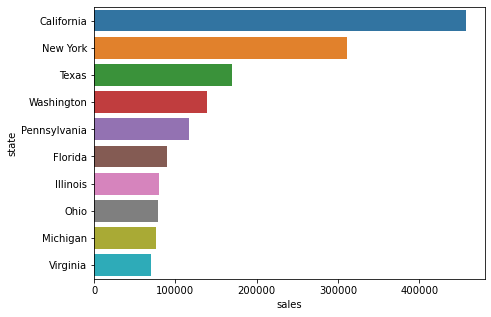

,state,quantity,sales
0,California,7667,457687.6315
1,New York,4224,310876.2710
2,Texas,3724,170188.0458
3,Washington,1883,138641.2700
4,Pennsylvania,2153,116511.9140
5,Florida,1379,89473.7080
6,Illinois,1845,80166.1010
7,Ohio,1759,78258.1360
8,Michigan,946,76269.6140
9,Virginia,893,70636.7200


In [18]:
sales_by_location = (
    data.groupby('state')
    .agg({'quantity': 'sum', 'sales': 'sum'})
    .sort_values('sales', ascending=False).head(10)
)
sales_by_location.reset_index(inplace=True)
plt.figure(figsize = (7,5))
sns.barplot(y = "state", x = "sales", data = sales_by_location)
plt.show()
display(sales_by_location)

Анализ показывает, что наибольшие показатели по продаже товаров имеют штаты California и New York. Что обусловлено тем, что два этих штата имеют особый статус: один в качестве притяжения IT-технологий, а второй - деловых интересов. При этом выделяются штаты Michigan и Virginia, в которых при меньшем количестве проданных товаров объем выручки сравним с другими штатами. Это показывает, что в данных штатах люди склонны приобретать более дорогие товары.

In [19]:
sales_by_manager = (
    data.groupby(['person', 'region'])
    .agg({'profit': 'sum', 'sales': 'sum'})
    .sort_values('sales', ascending=False).head(10)
)
display(sales_by_manager)

,,profit,sales
person,region,,
Anna Andreadi,West,108418.08,725457.8245
Chuck Magee,East,91522.39,678781.2400
Kelly Williams,Central,39706.07,501239.8908
Cassandra Brandow,South,46749.35,391721.9050


Анализ по менеджерам по продажам и регионам (в каждом из которых свой менеджер) подтверждает выводы, сделанные ранее при анализе продаж по штатам. Запад (Калифорния) и Восток (Нью-Йорк) имеют наибольший потребительский потенциал (т.е. есть спрос и возможности приобретать товары).

### <a id='research-centre-or-no-centre'><span style="color:black">Определение целевой аудитории</span></a> 

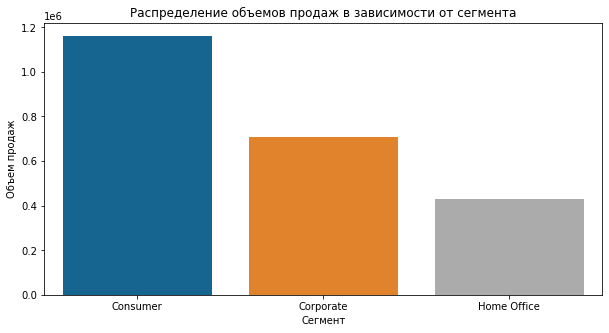

,segment,sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


In [20]:
target_market = (
    data.groupby(['segment'])
    .agg({'sales': 'sum'})
    .sort_values('sales', ascending=False))

target_market.reset_index(inplace=True)
plt.style.use('tableau-colorblind10')
plt.figure(figsize = (10,5))
sns.barplot(data=target_market.sort_values('sales', ascending=False), 
            y='sales', x='segment')

plt.title('Распределение объемов продаж в зависимости от сегмента')
plt.xlabel('Сегмент')
plt.ylabel('Объем продаж')
plt.show()
display(target_market)  

Распределение продаж в зависимости от сегмента показывает, что наибольшие траты на товары осуществляют обычные бытовые потребители.

## <a id='hypothesis-testing'><span style="color:black">5. Проверка гипотез</span></a>

### <a id='revenue-difference'><span style="color:black">Проверка гипотезы о различной средней прибыли по продажам товаров категории Technology и Furniture</span></a>

In [23]:
technology = data[data['category'] == 'Technology']
furniture = data[data['category'] == 'Furniture']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(technology['profit'], office_supplies['profit'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.245819404232549e-12
Отвергаем нулевую гипотезу


Исходя из полученных результатов есть основания отвергнуть нулевую гипотезу в пользу альтернативной.

## <a id='conclusions'><span style="color:black">5. Выводы</span></a> 

1. В ходе выполнения проекта были решены следующие задачи.

 - произведна замена названий столбцов,
 - удалены столбцы, которые не будут использоваться для анализа данных, 
 - произведено округление значений прибыли,
 - произведен расчет месяца заказа, 
 - произведен расчет срока доставки.
 
2. В ходе анализа данных были установлены следующие зависимости.
    - Наблюдается повышение потребительского интереса в конце года, в начале года спрос на товары низкий и со временем он увеличивается.
    - Покупатели предпочитаю экономить на доставке и не готовы доплачивать за нее.
    - Товары категори Technology имеют наибольшую прибыль, вместе с тем при наличии достаточного спроса сравнимую прибыль можно получить от продажи товаров категории Office Supplier.
    - Спрос на товары может определятся территорией: крупные интеллектуальные и деловые центры требуют больше товаров. Штаты Michigan и Virginia можно рассмотреть на возможность продажи более дорогих товаров.
    - Бытовые потребители покупают наибольшее количество товаров.
    - Есть основания отвергнуть гипотезу о том, что средняя выручка по категориям Technology и Futniture одинаковая.